In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets,transforms

In [2]:
#Defining the data transformation 
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
#Loading the training dataset
train_dataset=datasets.MNIST(root="./data",train=True,transform=transform,download=True)  
#Loading the testing dataset 
test_dataset=datasets.MNIST(root="./data",train=False,transform=transform,download=True)

In [3]:
#Loading the training dataloader
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=600,shuffle=True) 
#Loading the testing dataloader
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=600,shuffle=False)

In [4]:
#Defining the model architecture
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork,self).__init__()
        #Defining the convolutional layers
        self.conv1=nn.Conv2d(1,32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
        #Defining the pooling layer
        self.pool=nn.MaxPool2d(2,2)
        #Defining the fully connected layers
        self.fc1=nn.Linear(64*7*7,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,x):
        #Forward pass
        x=self.pool(torch.relu(self.conv1(x)))
        x=self.pool(torch.relu(self.conv2(x)))
        x=x.view(-1,64*7*7)
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

In [5]:
#Instantiating the model
model=ConvolutionalNeuralNetwork()
#Displaying the model architecture
print(model)

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [6]:
#Defining the loss function
criterion=nn.CrossEntropyLoss()
#Defining the optimizer 
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [7]:
epochs=50
train_accuracy=[] 
train_accuracies=0 
train_loss=[] 
train_losses=0.0
test_accuracy=[]  
test_accuracies=0 
test_loss=[] 
test_losses=0.0
#Training the model
model.train()
for i in range(epochs):
    train_correct=0
    train_losses=0.0  
    train_total=0     
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        #Backward pass
        loss.backward()
        optimizer.step()
        train_losses+=loss.item()
        _,predicted=outputs.max(1)
        train_total+=labels.size(0)
        train_correct+=predicted.eq(labels).sum().item()
    train_loss.append(train_losses/len(train_loader))
    train_accuracies=(100*train_correct/train_total) 
    train_accuracy.append(train_accuracies) 
    #Testing the model
    model.eval()
    test_correct=0
    test_losses=0.0       
    test_total=0      
    for inputs,labels in test_loader:
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        test_losses+=loss.item()
        _,predicted=outputs.max(1)
        test_total+=labels.size(0)
        test_correct+=predicted.eq(labels).sum().item()
    test_loss.append(test_losses/len(test_loader))
    test_accuracies=(100*test_correct/test_total) 
    test_accuracy.append(test_accuracies)  
    #Displaying the training and testing metrics 
    print(f"Epoch:{i+1:2} Training Accuracy:{train_accuracy[-1]:6.2f}% Training Loss:{train_loss[-1]:6.4f} Testing Accuracy:{test_accuracy[-1]:6.2f}% Testing Loss:{test_loss[-1]:6.4f}")

Epoch: 1 Training Accuracy: 89.36% Training Loss:0.3726 Testing Accuracy: 96.80% Testing Loss:0.1019
Epoch: 2 Training Accuracy: 97.70% Training Loss:0.0775 Testing Accuracy: 98.29% Testing Loss:0.0557
Epoch: 3 Training Accuracy: 98.35% Training Loss:0.0538 Testing Accuracy: 98.52% Testing Loss:0.0480
Epoch: 4 Training Accuracy: 98.71% Training Loss:0.0421 Testing Accuracy: 98.65% Testing Loss:0.0428
Epoch: 5 Training Accuracy: 98.89% Training Loss:0.0367 Testing Accuracy: 98.88% Testing Loss:0.0340
Epoch: 6 Training Accuracy: 99.05% Training Loss:0.0297 Testing Accuracy: 98.81% Testing Loss:0.0361
Epoch: 7 Training Accuracy: 99.28% Training Loss:0.0243 Testing Accuracy: 98.88% Testing Loss:0.0333
Epoch: 8 Training Accuracy: 99.32% Training Loss:0.0226 Testing Accuracy: 98.83% Testing Loss:0.0330
Epoch: 9 Training Accuracy: 99.49% Training Loss:0.0168 Testing Accuracy: 98.74% Testing Loss:0.0390
Epoch:10 Training Accuracy: 99.48% Training Loss:0.0161 Testing Accuracy: 98.96% Testing Lo

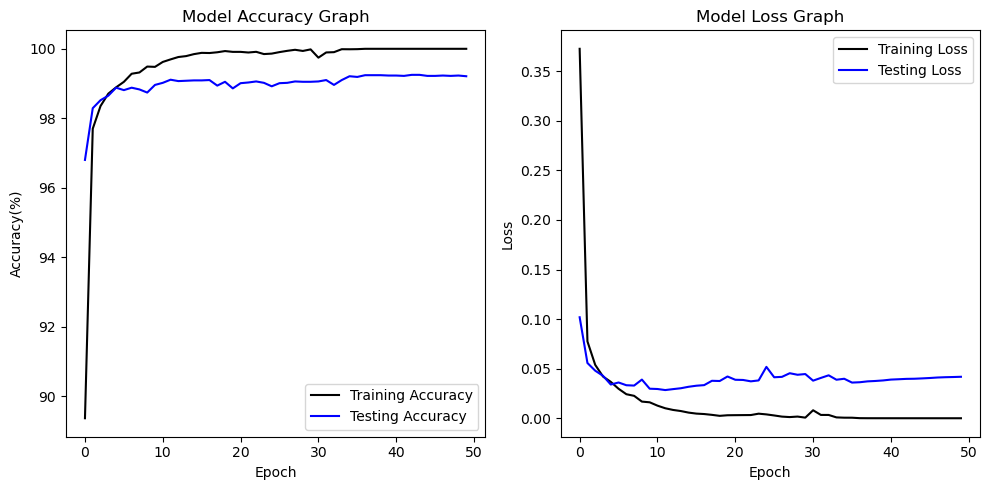

In [8]:
plt.figure(figsize=(10,5))
#Plotting the training and testing accuracy 
plt.subplot(1,2,1) 
plt.plot(range(epochs),train_accuracy,color="black",label="Training Accuracy") 
plt.plot(range(epochs),test_accuracy,color="blue",label="Testing Accuracy") 
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.title("Model Accuracy Graph")
plt.legend()
#Plotting the training and testing loss
plt.subplot(1,2,2) 
plt.plot(range(epochs),train_loss,color="black",label="Training Loss") 
plt.plot(range(epochs),test_loss,color="blue",label="Testing Loss") 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss Graph")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#Saving the model
torch.save(model.state_dict(),"Convolutional_Neural_Network.pth")